# Discrimination vs GDP

- A brief application of beta-binomial conjugate pair to examine the ratio of discrimination with respect to GDP.
- GA: GDP above Korea
- GB: GDB below Korea

In [108]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

|D/G|GA | GB |
|---|---|---|
|DY| 13 | 18 |
|DN| 8 | 12 |

In [109]:
DN_GA = 8
DN_GB = 12

DY_GA = 13  # False Case
DY_GB = 18  # True Case
DY = DY_GA + DY_GB

# for simple notation
y = DY_GB
n = DY_GA + DY_GB

The probability of getting DY_GB (the number of cases) out of total DY trials is modeled by binomial distriubtion:
$$
    y \sim \mathrm{Bin}(DY, \theta)
$$
According to the observation table, $y=18$ out of $31$.

The question is how to get a shape of the distribution of $\theta$, which is the ratio of true events.

The prior distribution for $\theta$ is modeled by $\mathrm{beta}(\alpha,\beta)$ distribution, where $\alpha,\beta$ are modeling hyper-parameters. We will examine several assumptions on these parameters.

### 1. $\alpha=\beta=1$

This case means we have no knowledge about the values of $\theta$. Its distribution is just flat in [0,1], meaning that any value is equally possible.

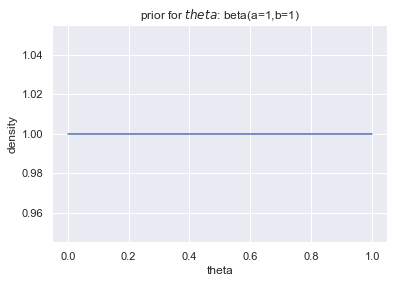

In [110]:
th = np.linspace(0,1,100)
beta11 = stats.beta(a=1,b=1)
beta11pdf = beta11.pdf(th)

plt.plot(th, beta11pdf);
plt.title('prior for $theta$: beta(a=1,b=1)');
plt.xlabel('theta')
plt.ylabel('density');

Then the posterior of $\theta$ given the observation $y=18$ is computed from the closed form solution:

$$
    p(\theta | y) = \mathrm{beta}(\alpha+y, \beta+n-y)
$$

which is obtained from the Bayes rule:

$$
    p(\theta|y) = \frac{ P(y|\theta) p(\theta) }{\int P(y|\theta) p(\theta) d\theta}
$$

So,
$$
    p(\theta | y=13) = \mathrm{beta}(1+18, 1+31-18)
$$


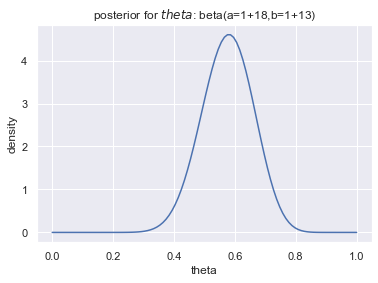

In [111]:
th = np.linspace(0,1,100)
beta11_posterior = stats.beta(a=1+y,b=1+n-y).pdf(th)

plt.plot(th, beta11_posterior);
plt.title(f'posterior for $theta$: beta(a=1+{y},b=1+{n-y})');
plt.xlabel('theta')
plt.ylabel('density');

In [112]:
ap, bp = 1 + y, 1 + n - y

print(f'The peak is at the mean: {ap / (ap + bp) : .5} in the graph.')

The peak is at the mean:  0.57576 in the graph.


In [113]:
post = stats.beta(a=ap,b=bp)
print(f'mean: {post.mean()}  median: {post.median()}')

mean: 0.5757575757575758  median: 0.5773061253340672


In [114]:
lb, ub = post.ppf(0.05), post.ppf(0.95)
lb, ub

(0.433487372989458, 0.7127250834083638)

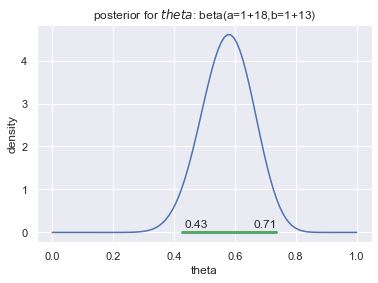

In [115]:
plt.plot(th, beta11_posterior);
plt.title(f'posterior for $theta$: beta(a=1+{y},b=1+{n-y})');
plt.axhline(y=0, xmin=lb, xmax=ub, c='g', linewidth=3)
plt.text(x=lb, y=.1, s=f'{lb:.2}')
plt.text(x=ub -.05, y=.1, s=f'{ub:.2}')
plt.xlabel('theta')
plt.ylabel('density');
plt.savefig('posterior_density_11.png')

Conclusion is that the probability of discrimination happening may be in between 43% and 71%.

---

### 2. $\alpha=5, \beta=3$

This case corresponds to the case where we believe a spread of rate of discrimination, as the density plot below shows.

It includes the rate of discrimination below 40%, which has about 22.7% of the density.

Prob[r < 0.5] = 22.7%


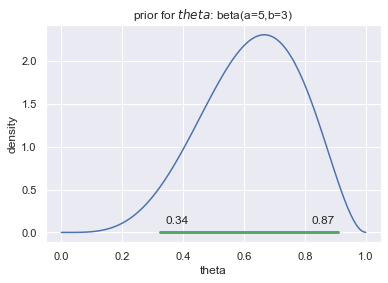

In [116]:
a, b = 5, 3
th = np.linspace(0,1,100)
beta11 = stats.beta(a=a,b=b)
beta11pdf = beta11.pdf(th)
lb, ub = beta11.ppf(0.05), beta11.ppf(0.95)  # 90% interval
print(f'Prob[r < 0.5] = {beta11.cdf(0.5)*100:.1f}%')


plt.plot(th, beta11pdf);
plt.title(f'prior for $theta$: beta(a={a},b={b})');
plt.axhline(y=0, xmin=lb, xmax=ub, c='g', linewidth=3)
plt.text(x=lb, y=.1, s=f'{lb:.2}')
plt.text(x=ub -.05, y=.1, s=f'{ub:.2}')
plt.xlabel('theta')
plt.ylabel('density');
plt.xlabel('theta')
plt.ylabel('density');

Then the posterior of $\theta$ given the observation $y=18$ is computed from the closed form solution:

$$
    p(\theta | y) = \mathrm{beta}(\alpha+y, \beta+n-y)
$$

which is obtained from the Bayes rule:

$$
    p(\theta|y) = \frac{ P(y|\theta) p(\theta) }{\int P(y|\theta) p(\theta) d\theta}
$$

So,
$$
    p(\theta | y=13) = \mathrm{beta}(1+18, 1+31-18)
$$


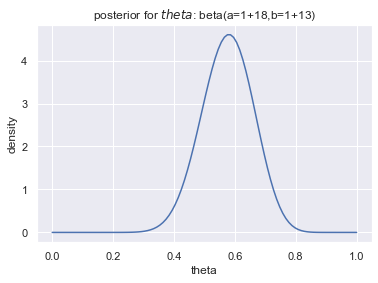

In [117]:
th = np.linspace(0,1,100)
beta11_posterior = stats.beta(a=1+y,b=1+n-y).pdf(th)

plt.plot(th, beta11_posterior);
plt.title(f'posterior for $theta$: beta(a=1+{y},b=1+{n-y})');
plt.xlabel('theta')
plt.ylabel('density');

In [118]:
ap, bp = a + y, b + n - y

print(f'The peak is at the mean: {ap / (ap + bp) : .5} in the graph.')

The peak is at the mean:  0.58974 in the graph.


In [119]:
post = stats.beta(a=ap,b=bp)
print(f'mean: {post.mean()}  median: {post.median()}')

mean: 0.5897435897435898  median: 0.5912929413351328


In [120]:
lb, ub = post.ppf(0.05), post.ppf(0.95)
lb, ub

(0.45901791144479387, 0.7151666734778421)

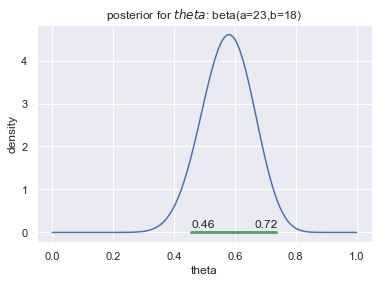

In [121]:
plt.plot(th, beta11_posterior);
plt.title(f'posterior for $theta$: beta(a={a+y},b={a+n-y})');
plt.axhline(y=0, xmin=lb, xmax=ub, c='g', linewidth=3)
plt.text(x=lb, y=.1, s=f'{lb:.2}')
plt.text(x=ub -.05, y=.1, s=f'{ub:.2}')
plt.xlabel('theta')
plt.ylabel('density');

End.

---
Let's consider both cases.

|D/G|GA | GB |
|---|---|---|
|DY| 13 | 18 |
|DN| 8 | 12 |

In [122]:
DN_GA = 8
DN_GB = 12
DN = DN_GA + DN_GB

DY_GA = 13  # False Case
DY_GB = 18  # True Case
DY = DY_GA + DY_GB

a, b = 1, 1

### Compare DY & DN cases

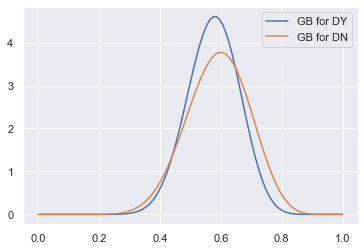

In [123]:
ap, bp = a + DY_GB, b + DY_GA
apdn, bpdn = a + DN_GB, b+DN_GA

x = np.linspace(0,1,100)
plt.plot(x, stats.beta(a=ap,b=bp).pdf(x), label='GB for DY');
plt.plot(x, stats.beta(a=apdn,b=bpdn).pdf(x), label='GB for DN');
plt.legend();

The two distributions look very similar. 
- Among DY group, about 60% are from GB group; 
- interestingly, about 60% among DN group are from GB.

### Compare GA & GB cases

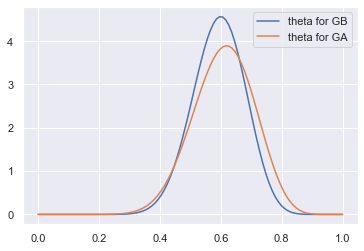

In [124]:
ap, bp = a + DY_GB, b + DN_GB
apdn, bpdn = a + DY_GA, b+DN_GA

x = np.linspace(0,1,100)
plt.plot(x, stats.beta(a=ap,b=bp).pdf(x), label='theta for GB');
plt.plot(x, stats.beta(a=apdn,b=bpdn).pdf(x), label='theta for GA');
plt.legend();

The two distributions look very similar again. 

Both groups says that there is discrimination.